Importing the Data from all the datafiles and setting it up as pandas for easy data hadling.

In [1]:
!pip install folium
!pip install geopandas
!pip install geopy
from geopy.distance import geodesic

In [2]:
import pandas as pd

# File path to your CSV file
file_path = r"C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\Supercharger.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())
print()

    Supercharger      Street Address City of Industry State    Zip Country  \
0    Corning, CA          950 Hwy 99          Corning    CA  96021     USA   
1  Roseville, CA  1151 Galleria Blvd        Roseville    CA  95678     USA   
2     Oxnard, CA   2751 Park View Ct           Oxnard    CA  93036     USA   
3   Buellton, CA     555 McMurray Rd         Buellton    CA  93427     USA   
4  El Centro, CA   3451 S Dogwood Rd        El Centro    CA  92243     USA   

   Stalls   Kw                     GPS  Elev  
0       6  150  39.926454, -122.198393    87  
1       7  150  38.771208, -121.266149    66  
2      20  150  34.238654, -119.177398    24  
3      10  150   34.61456, -120.188387   114  
4      12  150  32.760837, -115.532486    -8  



In [3]:
import pandas as pd

# Load the CSV files into DataFrames
df_50_items = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\Supercharger.csv")
df_20_items = pd.read_csv('supercharger_nodes_copy.csv')

# Assuming the column of interest is named 'Item' in both DataFrames
# and 'AdditionalData' is the column you want from the 50-item file
# Find the items that are in both DataFrames
matching_items = df_50_items[df_50_items['GPS'].isin(df_20_items['Supercharger'])]

# Extract the 'AdditionalData' column for these matching items
additional_data_for_matching_items = matching_items[['GPS', 'Zip']]

# Now, 'additional_data_for_matching_items' contains the 'Item' and 'AdditionalData' columns for the matching items
# print(additional_data_for_matching_items)


In [4]:
len(additional_data_for_matching_items)

43

In [5]:
additional_data_for_matching_items.to_csv('reduced_superchargers.csv')

PLOTTING ALL SUPERCHARGERS IN THE DATA

In [6]:
import pandas as pd
import folium

# Sample DataFrame (Replace this with your actual DataFrame)
# data = pd.read_csv(file_path)
data = pd.read_csv('reduced_superchargers.csv')

# Check the columns in your DataFrame
print(data.columns)

# Assuming 'Zip' column contains ZIP codes as strings and 'GPS' column contains coordinates

# Create a map centered on a location (e.g., California)
map_california = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Check if the necessary columns exist before using them
if 'Zip' in data.columns and 'GPS' in data.columns:
    # Loop through the DataFrame rows and plot markers for each ZIP code's location
    for index, row in data.iterrows():
        zip_code = row['Zip']
        coordinates = row['GPS'].split(', ')
        lat, lon = float(coordinates[0]), float(coordinates[1])

        # Add markers for each ZIP code's location
        folium.Marker([lat, lon], popup=f"ZIP: {zip_code}").add_to(map_california)
else:
    print("Required columns are missing in the DataFrame.")

# Display the map
map_california


Index(['Unnamed: 0', 'GPS', 'Zip'], dtype='object')


Los Angeles, Santa Monica, Thousanda Oaks, Pasadena, Santa Clarita, Santa Barbara, Santa Maria,culver city, malibu , glendale, burbank, sanfernando calabasas, west hollywood, simi valley 

In [7]:
import pandas as pd

# File path to your CSV file
file_path = r"C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\cal_road_net_edge.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())
print(data)

   Sl  Node1  Node2  Distance
0   0      0      1  0.002025
1   1      0      6  0.005952
2   2      1      2  0.014350
3   3      2      3  0.012279
4   4      3      4  0.011099
          Sl  Node1  Node2  Distance
0          0      0      1  0.002025
1          1      0      6  0.005952
2          2      1      2  0.014350
3          3      2      3  0.012279
4          4      3      4  0.011099
...      ...    ...    ...       ...
21688  21688  21042  21043  0.003753
21689  21689  21043  21044  0.003599
21690  21690  21044  21045  0.013969
21691  21691  21044  21047  0.009922
21692  21692  21045  21046  0.015084

[21693 rows x 4 columns]


In [8]:
file_path = r"C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\cal_road_network_node.csv"
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())
print(data)

# Displaying original DataFrame
print("Original DataFrame:")
print(data)

# Swapping columns 'Latitude' and 'Longitude'
data['Latitude'], data['Longitude'] = data['Longitude'], data['Latitude']

# Displaying DataFrame after swapping
print("\nDataFrame after swapping columns:")
print(data)

   Node    Latitude  Longitude
0     0 -121.904167  41.974556
1     1 -121.902153  41.974766
2     2 -121.896790  41.988075
3     3 -121.889603  41.998032
4     4 -121.886681  42.008739
        Node    Latitude  Longitude
0          0 -121.904167  41.974556
1          1 -121.902153  41.974766
2          2 -121.896790  41.988075
3          3 -121.889603  41.998032
4          4 -121.886681  42.008739
...      ...         ...        ...
21043  21043 -117.042160  32.550213
21044  21044 -117.043533  32.546886
21045  21045 -117.055840  32.553497
21046  21046 -117.067970  32.562462
21047  21047 -117.035332  32.541302

[21048 rows x 3 columns]
Original DataFrame:
        Node    Latitude  Longitude
0          0 -121.904167  41.974556
1          1 -121.902153  41.974766
2          2 -121.896790  41.988075
3          3 -121.889603  41.998032
4          4 -121.886681  42.008739
...      ...         ...        ...
21043  21043 -117.042160  32.550213
21044  21044 -117.043533  32.546886
21045  21045

range of latitude:
33.986779 to 34.952928 (South most point of our area to North most point of our area)

range of longitude:
-118.078417 to -120.434555 (East most point of our area to West most point of our area)

Filter the node data to include only the area of interest- for the given range of latitude and longitude as shown above

Area we are considering is from Los Angeles City Center/Downtown to Santa Maria including Santa Barbara (around 160-170 miles)

In [9]:
# Creating a DataFrame
df = pd.DataFrame(data)

def limit_coordinates(df, min_lat, max_lat, min_long, max_long):
    # Limit latitude
    df = df[(df['Latitude'] >= min_lat) & (df['Latitude'] <= max_lat)]

    # Limit longitude
    df = df[(df['Longitude'] >= min_long) & (df['Longitude'] <= max_long)]

    return df

# Specifying the range to filter
filtered_data = limit_coordinates(df, 33.986779, 34.952928, -120.434555,-118.078417 )
# filtered_data = limit_coordinates(df, 33.986779, 34.952928, -120.434555,-118.06842 )
print(filtered_data)


        Node   Latitude   Longitude
15237  15237  34.946918 -120.433487
15238  15238  34.941998 -120.428612
15239  15239  34.939190 -120.428589
15240  15240  34.933487 -119.508163
15241  15241  34.936329 -119.477669
...      ...        ...         ...
18163  18163  33.996593 -118.082550
18166  18166  34.017471 -118.157440
18167  18167  33.997597 -118.135513
18192  18192  34.008308 -118.166206
18193  18193  33.997498 -118.167213

[1294 rows x 3 columns]


In [10]:
filtered_data.to_csv("reduced_node_netowrk.csv")

In [11]:
road_edge_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\Cal_road_net_edge.csv')

Matching the nodes that are in the filtered df (nodes in our area of interest) to the Cal_road_edge_data and finding the distances between these nodes

In [12]:
def create_reduced_edge_network(node_data, edge_data):
    # Filter edge data where both Node1 and Node2 are in the node data
    reduced_edge_data = edge_data[
        edge_data['Node1'].isin(node_data['Node']) & 
        edge_data['Node2'].isin(node_data['Node'])
    ]
    return reduced_edge_data

In [13]:
# Create the reduced edge network
reduced_edge_network = create_reduced_edge_network(filtered_data, road_edge_data)

Distances between nodes in our area of interest

In [14]:
reduced_edge_network

,Sl,Node1,Node2,Distance
15625,15625,15237,15238,0.006927
15626,15626,15238,15239,0.002808
15627,15627,15239,15269,0.003245
15628,15628,15240,15241,0.030627
15629,15629,15240,15254,0.013047
...,...,...,...,...
18603,18603,18077,18078,0.007301
18604,18604,18078,18134,0.005316
18679,18679,18148,18149,0.029665
18700,18700,18166,18167,0.029594


In [15]:
# Save the reduced edge network to a CSV file
reduced_edge_network.to_csv("reduced_edge_network.csv", index=False)

In [16]:
# Select only the desired columns
selected_df = reduced_edge_network[['Node1', 'Node2', 'Distance']]

# Write to a new CSV file without headers and index
selected_df.to_csv('input.csv', index=False)

DO NOT CONSIDER THE BELOW CODE: THIS WAS OUR INITIAL TESTING

In [17]:

# # import pandas as pd
# # import networkx as nx
# # import geopandas as gpd
# # from shapely.geometry import Point
# # import matplotlib.pyplot as plt

# # Step 1: Read Data
# supercharger_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\ON_SCS_latlong.csv')
# road_node_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\reduced_node_netowrk.csv')
# road_edge_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\reduced_edge_network.csv')

# # Extract Latitude and Longitude from GPS column
# supercharger_data[['Latitude', 'Longitude']] = supercharger_data['GPS'].str.split(',', expand=True).astype(float)

# # Step 2: Create Road Network

# G = nx.Graph()
# for index, row in road_node_data.iterrows():
#     G.add_node(row['Node'], pos=(row['Longitude'], row['Latitude']))

# for index, row in road_edge_data.iterrows():
#     G.add_edge(row['Node1'], row['Node2'], weight=row['Distance'])

# # Step 3: Find Nearest Supercharger
# # supercharger_points = gpd.GeoDataFrame(supercharger_data, geometry=gpd.points_from_xy(supercharger_data['Longitude'], supercharger_data['Latitude']))
# # supercharger_points = gpd.GeoDataFrame(supercharger_data, geometry=gpd.points_from_xy(supercharger_data['Longitude'], supercharger_data['Latitude']))

# # for node in G.nodes:
# #     node_coords = road_node_data.loc[road_node_data['Node'] == node, ['Longitude', 'Latitude']].values.flatten()
# #     node_point = Point(node_coords[0], node_coords[1])
# #     nearest_supercharger = supercharger_points.geometry.distance(node_point).idxmin()
# #     G.nodes[node]['nearest_supercharger'] = nearest_supercharger
# supercharger_points = gpd.GeoDataFrame(supercharger_data, geometry=gpd.points_from_xy(supercharger_data['Longitude'], supercharger_data['Latitude']))

# csv_data=[]
# for node in G.nodes:
#     node_coords = road_node_data.loc[road_node_data['Node'] == node, ['Longitude', 'Latitude']].values.flatten()
#     node_point = (node_coords[1], node_coords[0])  # Latitude, Longitude
    
#     # Calculate distances to all superchargers and find the nearest one
#     nearest_supercharger_distance = float('inf')
#     nearest_supercharger_idx = None
    
#     for idx, supercharger in supercharger_points.iterrows():
#         supercharger_coords = (supercharger['Latitude'], supercharger['Longitude'])
#         distance = geodesic(node_point, supercharger_coords).kilometers
        
#         # Update nearest supercharger if this one is closer
#         if distance < nearest_supercharger_distance:
#             nearest_supercharger_distance = distance
#             nearest_supercharger_idx = idx
            
#     csv_data.append({
#         'Node_Point': node_point,
#         'Supercharger_Coords': nearest_supercharger_coords,
#         'Distance': nearest_supercharger_distance
#     })
#     # Define a threshold distance based on nearest supercharger distance
#     threshold_distance = 10  # Set a threshold distance of 10 kilometers
    
#     # Mark the node as a supercharger if it's within the threshold distance to the nearest supercharger
#     if nearest_supercharger_distance < threshold_distance:
#         G.nodes[node]['supercharger'] = True
#     else:
#         G.nodes[node]['supercharger'] = False


# # # Step 4: Modify Graph
# # supercharger_nodes = list(supercharger_data['Node'])
# # for node in G.nodes:
# #     if node in supercharger_nodes:
# #         G.nodes[node]['supercharger'] = True
# #     else:
# #         G.nodes[node]['supercharger'] = False

# # Step 5: Plot the Graph
# pos = nx.get_node_attributes(G, 'pos')
# supercharger_attr = nx.get_node_attributes(G, 'supercharger')
# node_colors = ['red' if supercharger_attr[node] else 'blue' for node in G.nodes]

# # nx.draw(G, pos, with_labels=False, node_color=node_colors)
# # Your existing code...

# # Set node sizes and colors
# node_sizes = [100 if G.nodes[node]['supercharger'] else 30 for node in G.nodes]
# supercharger_nodes = [node for node in G.nodes if G.nodes[node]['supercharger']]
# non_supercharger_nodes = [node for node in G.nodes if not G.nodes[node]['supercharger']]
# node_colors = ['red' if node in supercharger_nodes else 'blue' for node in G.nodes]

# # Plot the graph
# plt.figure(figsize=(10, 8))

# # Plot non-supercharger nodes
# nx.draw_networkx_nodes(G, pos, nodelist=non_supercharger_nodes, node_size=30, node_color='blue')

# # Plot supercharger nodes separately with a different color and larger size
# nx.draw_networkx_nodes(G, pos, nodelist=supercharger_nodes, node_size=100, node_color='red')

# # Draw edges
# nx.draw_networkx_edges(G, pos)

# # Separate legend for supercharger and non-supercharger nodes
# plt.scatter([], [], c='red', s=100, label='Supercharger')
# plt.scatter([], [], c='blue', s=100, label='Non-Supercharger')
# plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper right')

# plt.show()

# # plt.show()
# '''

In the below code, we only consider the reduced number of superchargers (44 in total- refer to ON_SCS_latlong.csv file), nodes and edges

Iterating over all nodes in our network, we find the nearest supercharger, and then for all superchargers, assign the nearest node to be considered as a supercharger, as the coordinates of the supercharger and the nodes in the data don't match exactly

In [18]:
import pandas as pd
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Step 1: Read Data
supercharger_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\ON_SCS_latlong.csv')
road_node_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\reduced_node_netowrk.csv')
road_edge_data = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\School\Fall 2023\IE 532\Project\Project Data\reduced_edge_network.csv')

# Extract Latitude and Longitude from GPS column
supercharger_data[['Latitude', 'Longitude']] = supercharger_data['GPS'].str.split(',', expand=True).astype(float)

# Step 2: Create Road Network

G = nx.Graph()
for index, row in road_node_data.iterrows():
    G.add_node(row['Node'], pos=(row['Longitude'], row['Latitude']))

for index, row in road_edge_data.iterrows():
    G.add_edge(row['Node1'], row['Node2'], weight=row['Distance'])

supercharger_points = gpd.GeoDataFrame(supercharger_data, geometry=gpd.points_from_xy(supercharger_data['Longitude'], supercharger_data['Latitude']))
    
# Initialize a list to store the data
node_to_supercharger = []

for node in G.nodes:
    node_coords = road_node_data.loc[road_node_data['Node'] == node, ['Longitude', 'Latitude']].values.flatten()
    node_point = (node_coords[1], node_coords[0])  # Latitude, Longitude
    
    # Initialize variables to track the nearest supercharger
    nearest_supercharger_distance = float('inf')
    nearest_supercharger_coords = None
    
    for idx, supercharger in supercharger_points.iterrows():
        supercharger_coords = (supercharger['Latitude'], supercharger['Longitude'])
        distance = geodesic(node_point, supercharger_coords).kilometers
        
        # Update nearest supercharger if this one is closer
        if distance < nearest_supercharger_distance:
            nearest_supercharger_distance = distance
            nearest_supercharger_coords = supercharger_coords
            
    node_to_supercharger.append({
        'Node': node,
        'Nearest_Supercharger': nearest_supercharger_coords,
        'Distance': nearest_supercharger_distance
    })

# Convert the list to a DataFrame
node_to_supercharger_df = pd.DataFrame(node_to_supercharger)

# Initialize a dictionary to store the nearest node for each supercharger
supercharger_to_nearest_node = {}

for idx, supercharger in supercharger_points.iterrows():
    supercharger_coords = (supercharger['Latitude'], supercharger['Longitude'])
    nearest_node = None
    min_distance = float('inf')

    for record in node_to_supercharger:
        if record['Nearest_Supercharger'] == supercharger_coords:
            if record['Distance'] < min_distance:
                min_distance = record['Distance']
                nearest_node = record['Node']

    supercharger_to_nearest_node[tuple(supercharger_coords)] = nearest_node

# Convert the dictionary to a DataFrame if needed
supercharger_to_nearest_node_df = pd.DataFrame(list(supercharger_to_nearest_node.items()), columns=['Supercharger', 'Nearest_Node'])



# plt.show()

In [19]:
supercharger_points

,Supercharger,Street Address,City of Industry,State,Zip,Country,Stalls,Kw,GPS,Elev,Latitude,Longitude,geometry
0,"Oxnard, CA",2751 Park View Ct,Oxnard,CA,93036,USA,20,150,"34.238654, -119.177398",24,34.238654,-119.177398,POINT (-119.17740 34.23865)
1,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150,"34.61456, -120.188387",114,34.614560,-120.188387,POINT (-120.18839 34.61456)
2,"Burbank - N Victory Blvd, CA",677 N Victory Blvd,Burbank,CA,91506,USA,24,250,"34.179384, -118.320974",175,34.179384,-118.320974,POINT (-118.32097 34.17938)
3,"Santa Barbara, CA",3943 State St,Santa Barbara,CA,93105,USA,16,250,"34.440227, -119.753359",61,34.440227,-119.753359,POINT (-119.75336 34.44023)
4,"Goleta, CA",7004 Market Pl Dr,Goleta,CA,93117,USA,12,250,"34.428885, -119.87338",11,34.428885,-119.873380,POINT (-119.87338 34.42889)
5,"Santa Clarita, CA",23975 Newhall Ranch Rd,Santa Clarita,CA,91355,USA,32,250,"34.431041, -118.554319",344,34.431041,-118.554319,POINT (-118.55432 34.43104)
6,"Burbank - North Third St, CA","501 N 3rd St, Top Parking Level",Burbank,CA,91502,USA,20,150,"34.18487, -118.311672",190,34.184870,-118.311672,POINT (-118.31167 34.18487)
7,"Thousand Oaks - East Thousand Oaks Blvd, CA",180 Promenade Way,Thousand Oaks,CA,91362,USA,24,150,"34.158291, -118.82363",289,34.158291,-118.823630,POINT (-118.82363 34.15829)
8,"Los Angeles - W Olympic Blvd, CA",11355 W Olympic Blvd,Los Angeles,CA,90064,USA,16,250,"34.03818, -118.443301",58,34.038180,-118.443301,POINT (-118.44330 34.03818)
9,"Pasadena, CA",155 E Green St,Pasadena,CA,91105,USA,24,72,"34.144835, -118.146609",258,34.144835,-118.146609,POINT (-118.14661 34.14484)


In [20]:
!pip install matplotlib geopandas

In [21]:
node_to_supercharger_df.to_csv("node_to_supercharger_df.csv")

PLOTTING THE NODES AND EDGES IN OUR REDUCED NETWORK AND THE NEW SUPERCHARGER LOCATIONS THAT ARE OVERLAYED ON THE NEAREST NODE TO THEM

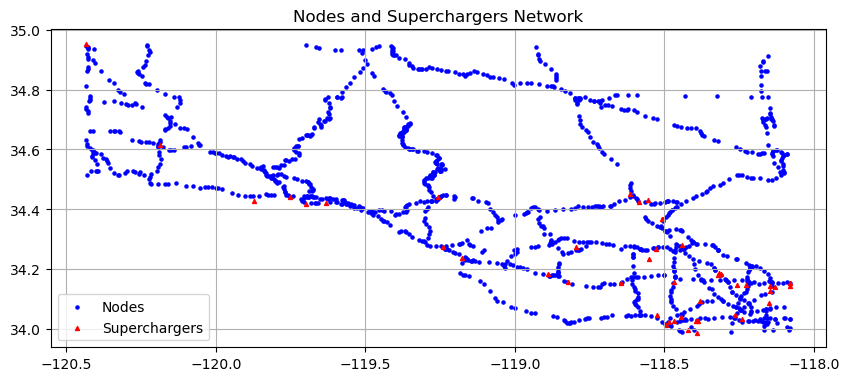

In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Create a GeoDataFrame for the nodes
gdf_nodes = gpd.GeoDataFrame(
    road_node_data, 
    geometry=gpd.points_from_xy(road_node_data['Longitude'], road_node_data['Latitude'])
)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting the nodes
gdf_nodes.plot(ax=ax, color='blue', marker='o', label='Nodes', markersize=5)

# Plotting the superchargers
supercharger_points.plot(ax=ax, color='red', marker='^', label='Superchargers', markersize=8)

# Add grid, legend, and title
ax.grid(True)
ax.legend()
ax.set_title("Nodes and Superchargers Network")

plt.show()


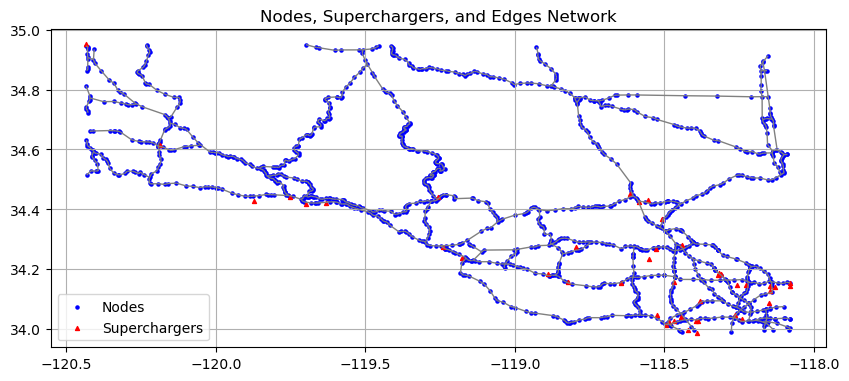

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

# Assuming 'road_node_data' DataFrame has 'Node', 'Longitude', and 'Latitude' columns
# Create a GeoDataFrame for the nodes
gdf_nodes = gpd.GeoDataFrame(
    road_node_data, 
    geometry=gpd.points_from_xy(road_node_data['Longitude'], road_node_data['Latitude'])
)

# Prepare edge data
edge_list = []
for _, edge in reduced_edge_network.iterrows():
    # Extracting the start and end node's coordinates
    node1_coords = gdf_nodes.loc[gdf_nodes['Node'] == edge['Node1']].geometry.values[0]
    node2_coords = gdf_nodes.loc[gdf_nodes['Node'] == edge['Node2']].geometry.values[0]
    
    # Create a LineString for the edge
    edge_list.append(LineString([node1_coords, node2_coords]))

# Create a GeoDataFrame for the edges
gdf_edges = gpd.GeoDataFrame(geometry=edge_list)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting the edges
gdf_edges.plot(ax=ax, linewidth=1, color='gray')

# Plotting the nodes
gdf_nodes.plot(ax=ax, color='blue', marker='o', label='Nodes', markersize=5)

# Plotting the superchargers
supercharger_points.plot(ax=ax, color='red', marker='^', label='Superchargers', markersize=8)

# Add grid, legend, and title
ax.grid(True)
ax.legend()
ax.set_title("Nodes, Superchargers, and Edges Network")

plt.show()


In [24]:
supercharger_to_nearest_node_df

,Supercharger,Nearest_Node
0,"(34.238654, -119.177398)",17037.0
1,"(34.61456, -120.188387)",15831.0
2,"(34.179384, -118.320974)",17262.0
3,"(34.440227, -119.753359)",16269.0
4,"(34.428885, -119.87338)",16373.0
5,"(34.431041, -118.554319)",16556.0
6,"(34.18487, -118.311672)",17256.0
7,"(34.158291, -118.82363)",17343.0
8,"(34.03818, -118.443301)",17898.0
9,"(34.144835, -118.146609)",17485.0


In [25]:
supercharger_to_nearest_node_df.to_csv("supercharger_nodes.csv")

In [27]:
# xy=pd.DataFrame(csv_data)
# xy.to_csv("Node_Supercharger_distance.csv")

NameError: name 'csv_data' is not defined

In [ ]:
# import matplotlib.pyplot as plt
# import geopandas as gpd
# from shapely.geometry import LineString

# # Assuming 'road_node_data' DataFrame has 'Node', 'Longitude', and 'Latitude' columns
# # Create a GeoDataFrame for the nodes
# gdf_nodes = gpd.GeoDataFrame(
#     road_node_data, 
#     geometry=gpd.points_from_xy(road_node_data['Longitude'], road_node_data['Latitude'])
# )

# # Prepare edge data
# edge_list = []
# for _, edge in reduced_edge_network.iterrows():
#     # Extracting the start and end node's coordinates
#     node1_coords = gdf_nodes.loc[gdf_nodes['Node'] == edge['Node1']].geometry.values[0]
#     node2_coords = gdf_nodes.loc[gdf_nodes['Node'] == edge['Node2']].geometry.values[0]
    
#     # Create a LineString for the edge
#     edge_list.append(LineString([node1_coords, node2_coords]))

# # Create a GeoDataFrame for the edges
# gdf_edges = gpd.GeoDataFrame(geometry=edge_list)

# # Create a Graph
# G = nx.Graph()

# # Adding edges from the DataFrame
# for _, row in df.iterrows():
#     G.add_edge(row['Node1'], row['Node2'], weight=row['Distance'])

# # Define your charger nodes
# charger_nodes = df1['Nearest_Node'].tolist()

# # Now plot the graph
# plt.figure(figsize=(12, 8))

# # Draw all the nodes and edges
# nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

# # Highlight the charger nodes
# nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), nodelist=charger_nodes, node_color='red', node_size=600)

# plt.title("Network Graph with Supercharger Nodes")
# plt.show()